In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import keras

from keras import backend as K

from keras.layers import Dense, Dropout

from keras.optimizers import Adam

from keras.src.legacy.preprocessing.image import ImageDataGenerator

from keras.models import Model

from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score



In [ ]:
train_datagen = ImageDataGenerator(

    rotation_range=10,         # Slight rotation
    width_shift_range=0.1,     # Minimal horizontal shift
    height_shift_range=0.1,    # Minimal vertical shift
    horizontal_flip=True,      # Flips image (remove if direction matters, e.g., text)
    fill_mode="nearest"
)


In [ ]:
test_val_datagen = ImageDataGenerator()

In [ ]:
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras import layers, models

# base_model = MobileNetV2(
#     input_shape=(128,128,3),
#     include_top=False,
#     weights="imagenet"
# )

# base_model.trainable = False  # VERY IMPORTANT


In [ ]:
# model = models.Sequential([
#     base_model,
#     layers.GlobalAveragePooling2D(),

#     #layers.BatchNormalization(),
#     #layers.Dense(256, activation="relu"),
#     layers.Dropout(0.2),

#     #layers.Dense(128, activation="relu"),
#     layers.Dropout(0.12),

#     layers.Dense(NUM_CLASSES, activation="softmax")
# ])


In [ ]:
DATASET_ROOT = "/content/drive/My Drive/Goslar_dataset_split"

train_path = os.path.join(DATASET_ROOT, "train")
valid_path   = os.path.join(DATASET_ROOT, "val")
test_path  = os.path.join(DATASET_ROOT, "test")


num_train_samples = 1920

num_val_samples = 240

num_test_samples=240

train_batch_size = 32

val_batch_size = 32

test_batch_size=240

image_size = 128

SEED = 42

In [ ]:
train_steps = int(np.ceil(num_train_samples / train_batch_size))

val_steps = int(np.ceil(num_val_samples / val_batch_size))

test_steps= int(np.ceil(num_test_samples / test_batch_size))
class_names=["Slate","Clay","Cement", "Flat_roof_coverings"]

In [ ]:
train_batches = train_datagen.flow_from_directory(

    directory=train_path,

    target_size=(image_size, image_size),

    batch_size=train_batch_size,
    #class_mode="categorical",
    shuffle=True,
    seed=SEED

     )

Found 1920 images belonging to 4 classes.


In [ ]:

valid_batches = test_val_datagen.flow_from_directory(

    directory=valid_path,

    target_size=(image_size, image_size),

    batch_size=val_batch_size,
    #class_mode="categorical",
    shuffle=False
    )

Found 240 images belonging to 4 classes.


In [ ]:
test_batches = test_val_datagen.flow_from_directory(

    test_path,

    target_size=(image_size, image_size),

    batch_size=test_batch_size,

    shuffle=False)

Found 240 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=8,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.3,
        patience=3,
        min_lr=1e-6,
        verbose=1
    ),
    ModelCheckpoint(
        "best_model.h5",
        monitor="val_loss",
        save_best_only=True,
        verbose=1
    )
]


In [ ]:
def graph(history):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  nepochs=len(history.history['loss'])
  plt.plot(range(nepochs), history.history['loss'],     'r-', label='train')
  plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='validation')
  plt.legend(prop={'size': 20})
  plt.ylabel('loss')
  plt.xlabel('# of epochs')
  plt.subplot(1,2,2)
  plt.plot(range(nepochs), history.history['accuracy'],     'r-', label='train')
  plt.plot(range(nepochs), history.history['val_accuracy'], 'b-', label='validation')
  plt.legend(prop={'size': 20})
  plt.ylabel('accuracy')
  plt.xlabel('# of epochs')

In [ ]:
# c=0
# base_model = tf.keras.applications.MobileNetV3Large(input_shape=(128, 128, 3), include_top=False, weights='imagenet', include_preprocessing=True)
# for layer in base_model.layers:
#   c=c+1
# print(c)

/usr/local/lib/python3.12/dist-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
187


/usr/local/lib/python3.12/dist-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.3092 - loss: 1.7059
Epoch 1: val_loss improved from inf to 1.37567, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 643s 11s/step - accuracy: 0.3096 - loss: 1.7032 - val_accuracy: 0.4000 - val_loss: 1.3757 - learning_rate: 0.0010
Epoch 2/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.4569 - loss: 1.3487
Epoch 2: val_loss improved from 1.37567 to 1.26803, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 614ms/step - accuracy: 0.4568 - loss: 1.3487 - val_accuracy: 0.5083 - val_loss: 1.2680 - learning_rate: 0.0010
Epoch 3/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.4600 - loss: 1.2587
Epoch 3: val_loss improved from 1.26803 to 1.22928, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 39s 642ms/step - accuracy: 0.4603 - loss: 1.2583 - val_accuracy: 0.5125 - val_loss: 1.2293 - learning_rate: 0.0010
Epoch 4/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.5294 - loss: 1.1732
Epoch 4: val_loss improved from 1.22928 to 1.15369, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 637ms/step - accuracy: 0.5293 - loss: 1.1732 - val_accuracy: 0.5458 - val_loss: 1.1537 - learning_rate: 0.0010
Epoch 5/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.5841 - loss: 1.1136
Epoch 5: val_loss did not improve from 1.15369
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 636ms/step - accuracy: 0.5838 - loss: 1.1136 - val_accuracy: 0.5292 - val_loss: 1.1580 - learning_rate: 0.0010
Epoch 6/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.5576 - loss: 1.0899
Epoch 6: val_loss did not improve from 1.15369
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 614ms/step - accuracy: 0.5578 - loss: 1.0898 - val_accuracy: 0.5417 - val_loss: 1.1622 - learning_rate: 0.0010
Epoch 7/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.5970 - loss: 1.0281
Epoch 7: val_loss improved from 1.15369 to 1.09350, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 621ms/step - accuracy: 0.5970 - loss: 1.0280 - val_accuracy: 0.5875 - val_loss: 1.0935 - learning_rate: 0.0010
Epoch 8/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.6229 - loss: 0.9883
Epoch 8: val_loss improved from 1.09350 to 1.07896, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 38s 624ms/step - accuracy: 0.6227 - loss: 0.9885 - val_accuracy: 0.6083 - val_loss: 1.0790 - learning_rate: 0.0010
Epoch 9/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.6046 - loss: 0.9844
Epoch 9: val_loss did not improve from 1.07896
60/60 ━━━━━━━━━━━━━━━━━━━━ 38s 633ms/step - accuracy: 0.6046 - loss: 0.9845 - val_accuracy: 0.5708 - val_loss: 1.0865 - learning_rate: 0.0010
Epoch 10/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.6200 - loss: 0.9705
Epoch 10: val_loss improved from 1.07896 to 1.04010, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 608ms/step - accuracy: 0.6200 - loss: 0.9705 - val_accuracy: 0.6167 - val_loss: 1.0401 - learning_rate: 0.0010
Epoch 11/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.6257 - loss: 0.9669
Epoch 11: val_loss did not improve from 1.04010
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 603ms/step - accuracy: 0.6260 - loss: 0.9662 - val_accuracy: 0.5833 - val_loss: 1.1033 - learning_rate: 0.0010
Epoch 12/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.6549 - loss: 0.9247
Epoch 12: val_loss did not improve from 1.04010
60/60 ━━━━━━━━━━━━━━━━━━━━ 38s 638ms/step - accuracy: 0.6549 - loss: 0.9246 - val_accuracy: 0.5875 - val_loss: 1.1360 - learning_rate: 0.0010
Epoch 13/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.6558 - loss: 0.9476
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.

Epoch 13: val_loss did not improve from 1.04010
60/60 ━━━━━━━━━━━━━━━━━━━━ 38s 628ms/step - accuracy: 0.6560 - loss: 0.9469 - val_accuracy:

60/60 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6701 - loss: 0.8615 - val_accuracy: 0.6292 - val_loss: 1.0110 - learning_rate: 1.0000e-05
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6776 - loss: 0.8569
Epoch 3: val_loss improved from 1.01100 to 0.99171, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.6778 - loss: 0.8564 - val_accuracy: 0.6250 - val_loss: 0.9917 - learning_rate: 1.0000e-05
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6914 - loss: 0.8391
Epoch 4: val_loss did not improve from 0.99171
60/60 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.6915 - loss: 0.8386 - val_accuracy: 0.6208 - val_loss: 1.0314 - learning_rate: 1.0000e-05
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7210 - loss: 0.7608
Epoch 5: val_loss improved from 0.99171 to 0.98187, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7210 - loss: 0.7608 - val_accuracy: 0.6458 - val_loss: 0.9819 - learning_rate: 1.0000e-05
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7106 - loss: 0.7820
Epoch 6: val_loss did not improve from 0.98187
60/60 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7108 - loss: 0.7816 - val_accuracy: 0.6208 - val_loss: 0.9969 - learning_rate: 1.0000e-05
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7350 - loss: 0.7418
Epoch 7: val_loss did not improve from 0.98187
60/60 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7350 - loss: 0.7418 - val_accuracy: 0.6250 - val_loss: 1.0102 - learning_rate: 1.0000e-05
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7382 - loss: 0.6905
Epoch 8: val_loss improved from 0.98187 to 0.96944, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.7384 - loss: 0.6906 - val_accuracy: 0.6458 - val_loss: 0.9694 - learning_rate: 1.0000e-05
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7531 - loss: 0.6943
Epoch 9: val_loss did not improve from 0.96944
60/60 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7530 - loss: 0.6944 - val_accuracy: 0.6542 - val_loss: 0.9747 - learning_rate: 1.0000e-05
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7586 - loss: 0.6535
Epoch 10: val_loss did not improve from 0.96944
60/60 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.7585 - loss: 0.6539 - val_accuracy: 0.6167 - val_loss: 1.0206 - learning_rate: 1.0000e-05
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7545 - loss: 0.6914
Epoch 11: ReduceLROnPlateau reducing learning rate to 2.9999999242136253e-06.

Epoch 11: val_loss did not improve from 0.96944
60/60 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7547 - loss: 0.6908 - val_accuracy: 0.6417 - 

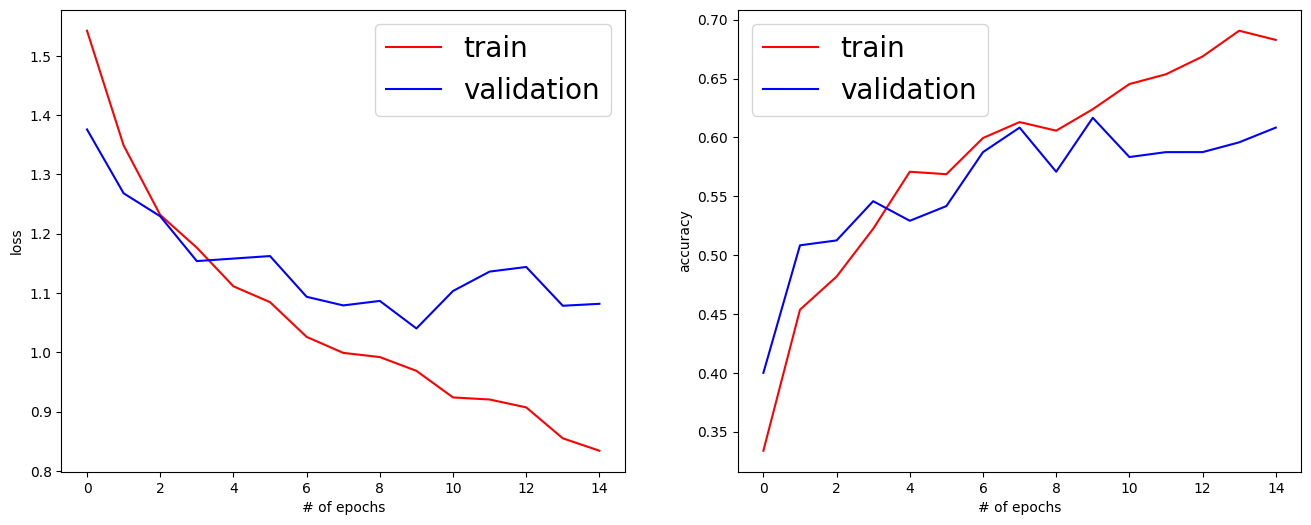

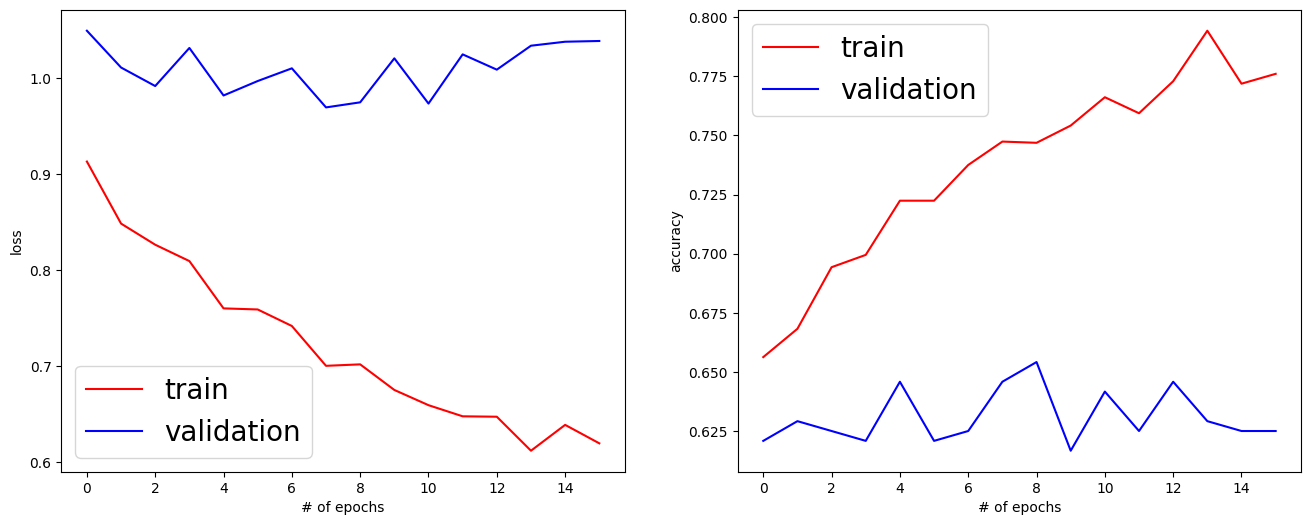

In [ ]:
#Testing
from keras.regularizers import l2


base_model = tf.keras.applications.MobileNetV3Large(input_shape=(128, 128, 3), include_top=False, weights='imagenet', include_preprocessing=True)
base_model.trainable = False

inputs = tf.keras.Input(shape=(128, 128, 3))
#x = tf.keras.applications.mobilenet_v3.preprocess_input(inputs)

x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
x = layers.Dropout(0.5)(x)
#x = layers.Dense(128, activation='relu')(x)
#x = layers.Dropout(0.3)(x)
outputs = layers.Dense(4, activation='softmax')(x)
model = models.Model(inputs, outputs)


model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])


history = model.fit(train_batches, steps_per_epoch=train_steps, validation_data=valid_batches, validation_steps=val_steps, epochs=15, verbose=1, callbacks=callbacks)
graph(history)

base_model.trainable = True
for layer in base_model.layers[-25:]:
    layer.trainable = True

for layer in base_model.layers:
  if isinstance(layer, layers.BatchNormalization):
    layer.trainable = False
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

print("Second phase training")

history = model.fit(train_batches, steps_per_epoch=train_steps, validation_data=valid_batches, validation_steps=val_steps, epochs=50, verbose=1, callbacks=callbacks)
graph(history)



In [ ]:
base_model.summary()

Model: "MobileNetV3Large"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 128, 128,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 64, 64,    │        432 │ rescaling[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 64, 64,    │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 64, 64,    │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        144 │ activation[0][0]  │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        256 │ re_lu[0][0]       │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_add   │ (None, 64, 64,    │          0 │ activation[0][0], │
│ (Add)               │ 16)               │            │ expanded_conv_pr… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 64, 64,    │      1,024 │ expanded_conv_ad… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 64, 64,    │        256 │ expanded_conv_1_… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 64, 64,    │          0 │ expanded_conv_1_… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 65, 65,    │          0 │ re_lu_1[0][0]     │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 32, 32,    │        576 │ expanded_conv_1_… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 32, 32,    │        256 │ expanded_conv_1_

 Total params: 2,996,352 (11.43 MB)

 Trainable params: 2,947,552 (11.24 MB)

 Non-trainable params: 48,800 (190.62 KB)

In [ ]:
loss, acc = model.evaluate(test_batches)
print("Test accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5583 - loss: 1.3185
Test accuracy: 0.5583333373069763


In [ ]:
def evaluate_model(generator, split_name):
    generator.reset()

    y_true = generator.classes
    y_pred_probs = model.predict(generator)
    y_pred = np.argmax(y_pred_probs, axis=1)

    print(f"\n📊 {split_name.upper()} RESULTS")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(
        y_true,
        y_pred,
        target_names=class_names,
        digits=4
    ))


evaluate_model(test_batches, "Test")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step

📊 TEST RESULTS
Accuracy: 0.5583333333333333
                     precision    recall  f1-score   support

              Slate     0.6308    0.6833    0.6560        60
               Clay     0.5135    0.6333    0.5672        60
             Cement     0.4643    0.4333    0.4483        60
Flat_roof_coverings     0.6444    0.4833    0.5524        60

           accuracy                         0.5583       240
          macro avg     0.5633    0.5583    0.5560       240
       weighted avg     0.5633    0.5583    0.5560       240



1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


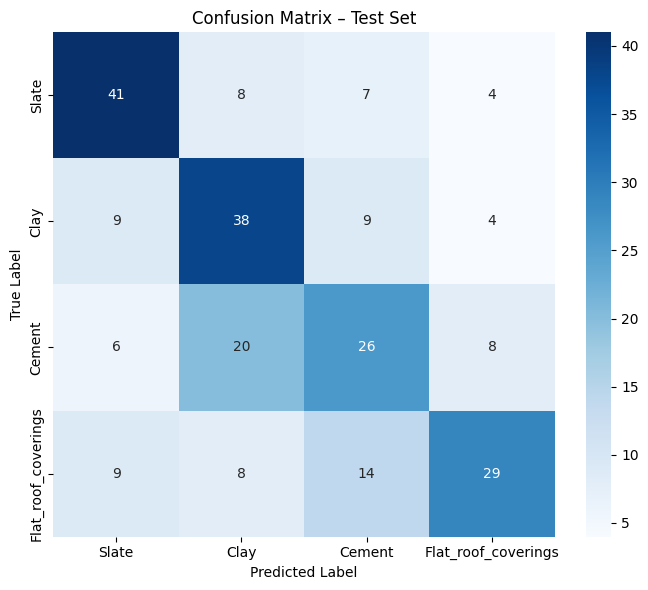

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, generator, class_names, title):
    """
    Plots confusion matrix for a given data generator
    """
    generator.reset()

    # Ground truth & predictions
    y_true = generator.classes
    y_pred_probs = model.predict(generator)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(7, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names
    )

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.tight_layout()
    plt.show()


plot_confusion_matrix(
    model,
    test_batches,
    class_names,
    title="Confusion Matrix – Test Set"
)

# **OPTUNA**

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2

def objective(trial):
    # 1. Suggest Search Space for High Performance
    # Fine-tuning usually requires very small learning rates
    lr_phase1 = trial.suggest_float("lr_phase1", 1e-4, 5e-3, log=True)
    lr_phase2 = trial.suggest_float("lr_phase2", 1e-6, 1e-4, log=True)

    # Overfitting Control (Crucial for 90% validation accuracy)
    dropout_rate = trial.suggest_float("dropout", 0.3, 0.7)
    l2_reg = trial.suggest_float("l2_reg", 1e-5, 1e-2, log=True)

    # Model Flexibility
    dense_units = trial.suggest_categorical("dense_units", [64, 128, 256, 512])
    unfreeze_layers = trial.suggest_int("unfreeze_layers", 20, 60)

    # 2. Build Model
    base_model = tf.keras.applications.MobileNetV3Large(
        input_shape=(128, 128, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False

    inputs = tf.keras.Input(shape=(128, 128, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(4, activation='softmax')(x)
    model = models.Model(inputs, outputs)

    # 3. Phase 1: Warm-up Top Layers
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_phase1),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_batches, epochs=5, validation_data=valid_batches, verbose=0)

    # 4. Phase 2: Targeted Fine-Tuning
    base_model.trainable = True
    for layer in base_model.layers[:-unfreeze_layers]:
        layer.trainable = False

    # Keep BatchNormalization frozen to prevent mean/variance drift
    for layer in base_model.layers:
        if isinstance(layer, layers.BatchNormalization):
            layer.trainable = False

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr_phase2),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    # Use EarlyStopping to prevent overfitting and return the best val_accuracy
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

    history = model.fit(train_batches, epochs=30, validation_data=valid_batches,
                        callbacks=[early_stop], verbose=0)

    # Optuna optimizes for the highest validation accuracy reached
    return max(history.history['val_accuracy'])

# 5. Execute Optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30) # Increase trials for better results

print(f"Best parameters: {study.best_params}")
